In [ ]:
#login på google bruger
from google.colab import auth
auth.authenticate_user()

In [ ]:
#login på google drev
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#navngiv mappe uden mellemrum
!ln -s /content/drive/My\ Drive/ mydrive

In [ ]:
#sæt stien til relevant mappe
%cd /content/mydrive/Image_recognition/vandfloom/

/content/drive/My Drive/Image_recognition/vandfloom


In [ ]:
#unzip mappe
!unzip /content/mydrive/Image_recognition/vandfloom/european-flood-2013_imgs_small.zip

In [ ]:
import pandas as pd
data=pd.read_csv("/content/mydrive/Image_recognition/vandfloom/labels.csv", delimiter=";") #refer til mappe med etiketter
data

column_names=['Image_location','Probability','Type'] #angive ny kolonnenavn

test=data #opret midlertidige dataframe pandas
col_dict = {test.columns[0]: column_names[0], test.columns[1]: column_names[1],test.columns[2]: column_names[2]}   # map tidligere kolonnenavne til nye kolonne navne
test.columns = [col_dict.get(x, x) for x in test.columns] #sæt tidligere kolonnenavne til nye
test.columns
data_locations=pd.DataFrame()
data_locations[['Image_location','Probability','Type']]=test[['Image_location','Probability','Type']] #gem resultat i filen data_locations


In [ ]:
data_locations

,Image_location,Probability,Type
0,25441112,1,NaN
1,25441113,1,NaN
2,25441114,1,NaN
3,25441115,1,NaN
4,25441162,1,NaN
...,...,...,...
3473,56555685,0,NaN
3474,56555780,0,NaN
3475,56555810,0,NaN
3476,56555926,0,NaN


In [ ]:
from shutil import copyfile

for i in range(0,len(data_locations)):
  if data_locations.Probability[i]==1:
    print(1)
    filename=data_locations.Image_location[i]+".jpg" #.split("/")[1]
    dir="/content/mydrive/Image_recognition/vandfloom/imgs_small/"
    dir_dst="/content/mydrive/Image_recognition/vandfloom/training/train_dir_1/"
    src=dir+filename
    dst=dir_dst+filename
    copyfile(src, dst)
    #copyfile(dst, src)
  else:
    print(0)
    filename=data_locations.Image_location[i]+".jpg" #.split("/")[1]
    dir="/content/mydrive/Image_recognition/vandfloom/imgs_small/"
    dir_dst="/content/mydrive/Image_recognition/vandfloom/training/train_dir_0/"
    src=dir+filename
    dst=dir_dst+filename
    copyfile(src, dst)
    #copyfile(dst, src)

1


KeyboardInterrupt: ignored

In [ ]:
#Separere billeder til træning og validering
import shutil #importer bibliotek til flytte filer
from shutil import copyfile
count_1=0
count_0=0
for i in range(0,len(data_locations)): #itererer igennem billeder
  if data_locations.Probability[i]==1 and count_1<60: #Hvis sandsynlighed er 1, køre loop og sæt maks antal af billeder, som anvendes til validering
    print(1) 
    filename=data_locations.Image_location[i]+".jpg" #specificere filnavn ved at datatabel 
    try: #forsøg at tilgå fil og ignorer hvis det ikke kan lade sig gøre
      dir="/content/mydrive/Image_recognition/vandfloom/training/train_dir_1/" #lokation for træningsdatasæt
      dir_dst="/content/mydrive/Image_recognition/vandfloom/validation/validation_dir_1/" #lokation for valideringsdatasæt
      src=dir+filename #definere kilde
      dst=dir_dst+filename #definere destination
      shutil.move(src, dst) #foretage flytning
      #shutil.move(dst,src)
      count_1=count_1+1 #stop flytning når maks antal billeder nåes
    except:
      print("")
  if data_locations.Probability[i] !=1 and count_0<60:  #Hvis sandsynlighed ikke er 1, køre loop og sæt maks antal af billeder, som anvendes til validering
    print(0)
    filename=data_locations.Image_location[i]+".jpg"  #specificere filnavn ved at datatabel 
    try: #forsøg at tilgå fil og ignorer hvis det ikke kan lade sig gøre
      dir="/content/mydrive/Image_recognition/vandfloom/training/train_dir_0/"  #lokation for træningsdatasæt
      dir_dst="/content/mydrive/Image_recognition/vandfloom/validation/validation_dir_0/" #lokation for valideringsdatasæt
      src=dir+filename #definere kilde
      dst=dir_dst+filename  #definere destination
      shutil.move(src, dst) #foretage flytning
      #shutil.move(dst,src)
      count_0=count_0+1  #stop flytning når maks antal billeder nåes
    except:
      print("")
  print("item_nr"+str(i)) #print fremskridt

1
item_nr0
1
item_nr1
1
item_nr2
1
item_nr3
1
item_nr4
1
item_nr5
1
item_nr6
1
item_nr7
1
item_nr8
1
item_nr9
1
item_nr10
1
item_nr11
1
item_nr12
1
item_nr13
1
item_nr14
1
item_nr15
1
item_nr16
1
item_nr17
1
item_nr18
1
item_nr19
1
item_nr20
1
item_nr21
1
item_nr22
1
item_nr23
1
item_nr24
1
item_nr25
1
item_nr26
1
item_nr27
1
item_nr28
1
item_nr29
1
item_nr30
1
item_nr31
1
item_nr32
1
item_nr33
1
item_nr34
1
item_nr35
1
item_nr36
1
item_nr37
1
item_nr38
1
item_nr39
1
item_nr40
1
item_nr41
1
item_nr42
1
item_nr43
1
item_nr44
1
item_nr45
1
item_nr46
1
item_nr47
1
item_nr48
1
item_nr49
1
item_nr50
1
item_nr51
1
item_nr52
1
item_nr53
1
item_nr54
1
item_nr55
1
item_nr56
1
item_nr57
1
item_nr58
1
item_nr59
item_nr60
item_nr61
item_nr62
item_nr63
item_nr64
item_nr65
item_nr66
item_nr67
item_nr68
item_nr69
item_nr70
item_nr71
item_nr72
item_nr73
item_nr74
item_nr75
item_nr76
item_nr77
item_nr78
item_nr79
item_nr80
item_nr81
item_nr82
item_nr83
item_nr84
item_nr85
item_nr86
item_nr87
item_nr88


In [ ]:
from PIL import Image #indhent bibliotek til håndtering af billeder
import numpy as np #indhent bibliotek til numerisk beregning
import os #indhent bibliotek til at navigere mapper

base_dir = '/content/mydrive/Image_recognition/vandfloom/' #sæt mapperod
train_dir = os.path.join(base_dir, 'training') #sæt mappe til træning
validation_dir = os.path.join(base_dir, 'validation') #sæt mappe til træning
# Sæt træningsmappe med billeder uden vandfloom 
train_0_dir = os.path.join(train_dir, 'train_dir_0')
# Sæt træningsmappe med billeder med vandfloom 
train_1_dir = os.path.join(train_dir, 'train_dir_1')
# Sæt valideringssmappe med billeder uden vandfloom 
validation_0_dir = os.path.join(validation_dir, 'validation_dir_0')
# Sæt valideringssmappe med billeder med vandfloom 
validation_0_dir = os.path.join(validation_dir, 'validation_dir_1')

In [ ]:
#check filer i træiningsmappe uden vandfloom 
train_0_fnames = os.listdir(train_0_dir)
print(train_0_fnames[:10])
#check filer i træiningsmappe med vandfloom 
train_1_fnames = os.listdir(train_1_dir)
train_1_fnames.sort()
print(train_1_fnames[:10])

['1.jpg', '32.jpg', '41.jpg', '136.jpg', '218.jpg', '140.jpg', '134.jpg', '31.jpg', '43.jpg', '166.jpg']
['26457966.jpg', '26457969.jpg', '26457971.jpg', '26457974.jpg', '26457980.jpg', '26457988.jpg', '26457998.jpg', '26458000.jpg', '26458005.jpg', '26458011.jpg']


In [ ]:
#check filer i valideringsmappe uden vandfloom 
validation_0_fnames = os.listdir(validation_0_dir)
print(validation_0_fnames[:10])
#check filer i valideringsmappe med vandfloom 
validation_1_fnames = os.listdir(validation_0_dir)
validation_1_fnames.sort()
print(validation_1_fnames[:10])

['25441113.jpg', '25441114.jpg', '25441115.jpg', '25441162.jpg', '25505067.jpg', '26377579.jpg', '26436388.jpg', '26438015.jpg', '26438108.jpg', '26451507.jpg']
['25441112.jpg', '25441113.jpg', '25441114.jpg', '25441115.jpg', '25441162.jpg', '25505067.jpg', '26377579.jpg', '26436388.jpg', '26438015.jpg', '26438108.jpg']


In [ ]:
print('antal træningsbileder uden vandfloom:', len(os.listdir(train_0_dir)))
print('antal træningsbileder med vandfloom:', len(os.listdir(train_1_dir)))
print('antal valideringsbileder uden vandfloom:', len(os.listdir(validation_0_dir)))
print('antal valideringsbileder med vandfloom::', len(os.listdir(validation_0_dir)))

antal træningsbileder uden vandfloom: 489
antal træningsbileder med vandfloom: 3091
antal valideringsbileder uden vandfloom: 60
antal valideringsbileder med vandfloom:: 60


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt #anvend matplot lib
import matplotlib.image as mpimg #indhent bibliotek til håndtering af billeder

# Parameter for graf, i 4x4 konfiguration
nrows = 4
ncols = 4

# Sæt indeks
pic_index = 0

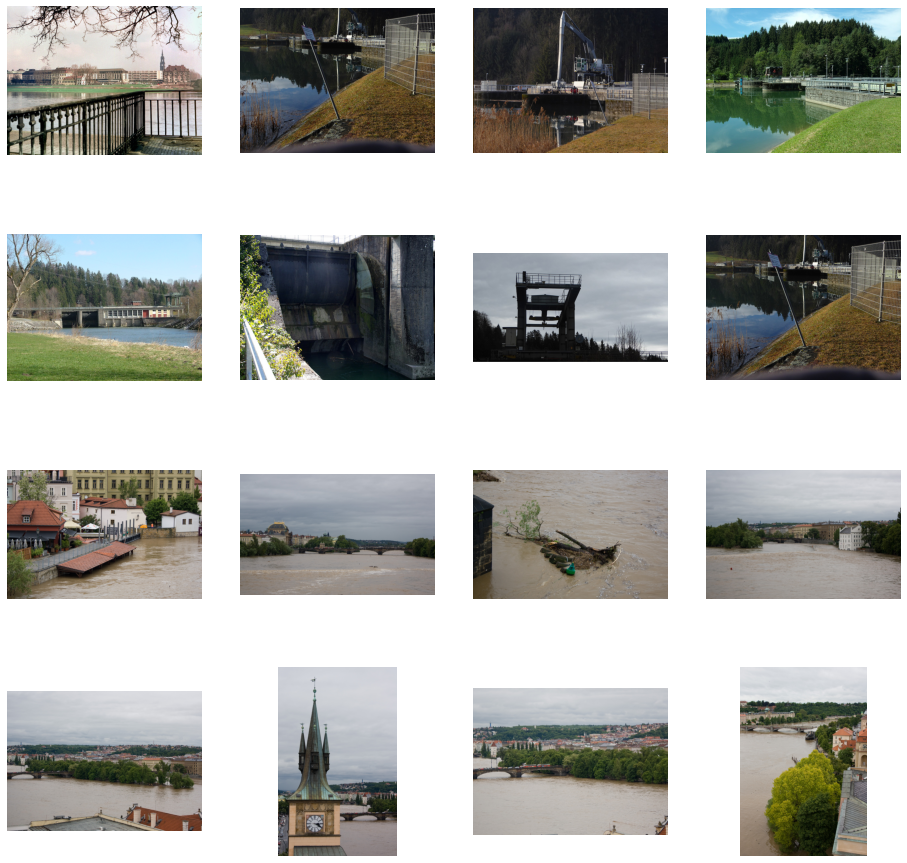

In [ ]:
# Konfigurere matplotlib figure, og sæt det til 4x4 konfiguration
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_fnames[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix): #iterer over billeder
  # Sæt plots; start indeks fra 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Fjerne akser fra visning

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show() #vis billeder


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(300, 300, 3)) #grey scale and 300x300

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=281,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 3358 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=11,  # 2000 images = batch_size * steps
      epochs=6,
      validation_data=validation_generator,
      validation_steps=6,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
82/82 - 224s - loss: 0.4390 - acc: 0.9037 - val_loss: 0.7794 - val_acc: 0.5000
Epoch 2/10
82/82 - 214s - loss: 0.3158 - acc: 0.9146
Epoch 3/10
82/82 - 213s - loss: 0.2708 - acc: 0.9229
Epoch 4/10
82/82 - 211s - loss: 0.2568 - acc: 0.9229
Epoch 5/10
82/82 - 210s - loss: 0.2739 - acc: 0.9167
Epoch 6/10
82/82 - 211s - loss: 0.2706 - acc: 0.9150
Epoch 7/10
82/82 - 211s - loss: 0.2394 - acc: 0.9220
Epoch 8/10
82/82 - 211s - loss: 0.2254 - acc: 0.9268
Epoch 9/10
82/82 - 215s - loss: 0.2080 - acc: 0.9285
Epoch 10/10
82/82 - 211s - loss: 0.2066 - acc: 0.9320


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


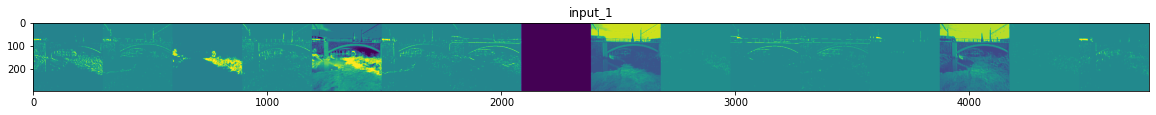

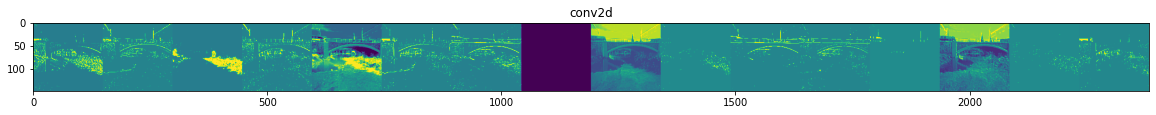

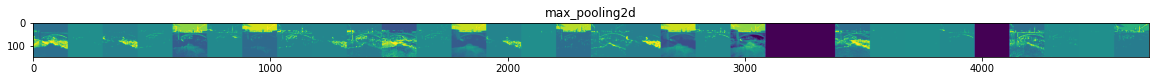

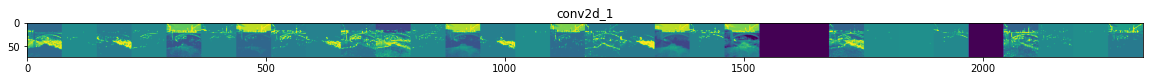

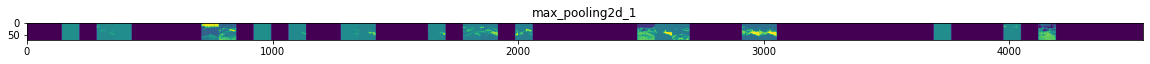

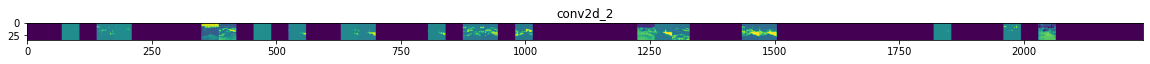

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
img_files_0 = [os.path.join(train_0_dir, f) for f in train_0_fnames]
img_files_1 = [os.path.join(train_1_dir, f) for f in train_1_fnames]
img_path = random.choice(img_files_0 + img_files_1)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ValueError: ignored

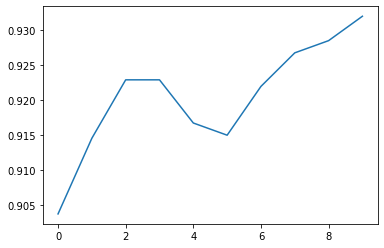

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import time
seconds = time.time()
print("Seconds since epoch =", seconds)	

Seconds since epoch = 1604671141.3705854


ValueError: ignored

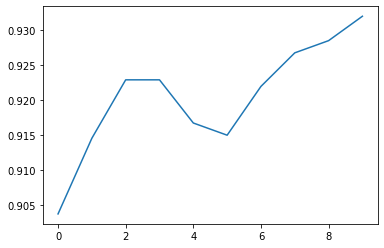

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
http://step.esa.int/main/toolboxes/snap/

https://github.com/gabrielagustin/Floods-monitoring/blob/master/FloodsMaps.py